In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

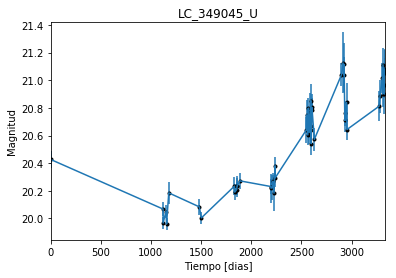

In [3]:
data = np.genfromtxt('LC_349045_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_349045_U')
plt.savefig("LC_349045_U.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

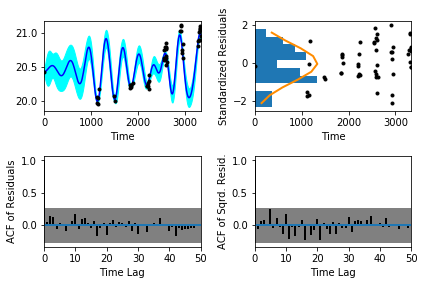

In [6]:
sample.assess_fit()

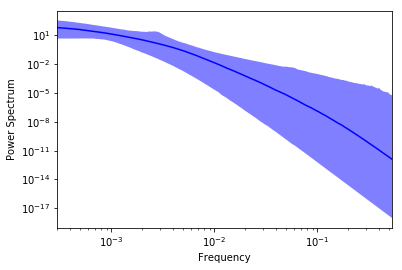

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

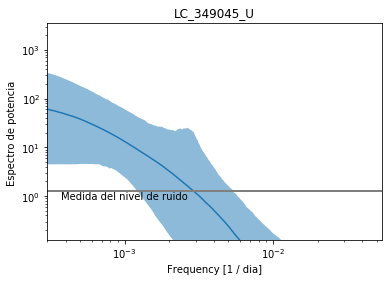

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_349045_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_349045_U')

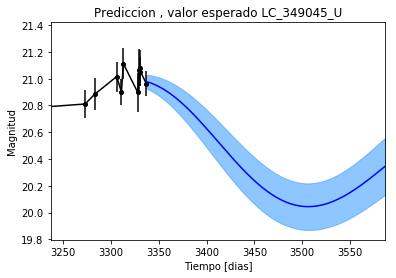

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_349045_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_349045_U')

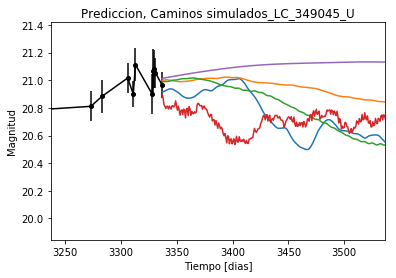

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_349045_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


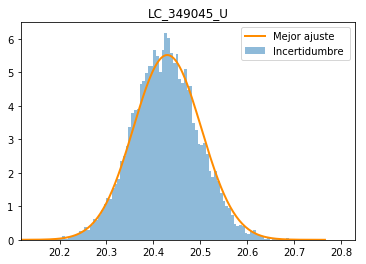

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_349045_U')
plt.savefig("Mejor_ajuste_LC_349045_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_349045_U')

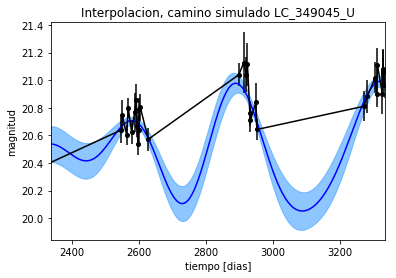

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_U')

Text(0.5,1,'Interpolacion, camino simulado LC_349045_U')

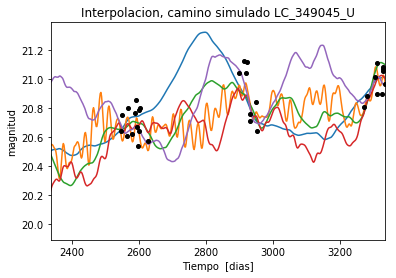

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 684.901569482
Median: 0.0108838552759
Standard deviation: 0.222684990998
68% credibility interval: [ 0.00085166  0.25230567]
95% credibility interval: [  3.47628293e-04   8.48481822e-01]
99% credibility interval: [  3.13157730e-04   1.01451011e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 481.391457728
Median: 0.00149602722406
Standard deviation: 0.0770827056189
68% credibility interval: [ 0.00041539  0.01537838]
95% credibility interval: [ 0.00031517  0.18390814]
99% credibility interval: [  3.03158963e-04   6.49778239e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 878.701785049
Median: 0.0183458119064
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1073.65457951
Median: 52.6311674054
Standard deviation: 1.57296894803
68% credibility interval: [ 50.92026102  53.7581235 ]
95% credibility interval: [ 48.41351929  54.51343466]
99% credibility interval: [ 46.3673867   54.96434533]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 450.057498507
Median: 0.58510152793
Standard deviation: 2.33782302595
68% credibility interval: [ 0.05435277  4.03966279]
95% credibility interval: [ 0.0155736  8.2026178]
99% credibility interval: [  1.03894831e-02   1.11839904e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1429.48241639
Median: 0.259238428962
Standard deviation: 8.5711186403
68% credibility interval: [ 0.00954941  6.00153193]
95% credibility interval: [  8.06113

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19954.7898023
Median: 1.72428832716e-29
Standard deviation: 6.59653834267e+18
68% credibility interval: [  1.93368766e-53   3.03532621e-08]
95% credibility interval: [  5.59897205e-74   5.13444240e+00]
99% credibility interval: [  1.55055145e-79   1.21851015e+02]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3135.99333343
Median: 20.4560295647
Standard deviation: 0.195721493703
68% credibility interval: [ 20.2944945   20.62426803]
95% credibility interval: [ 20.08059092  20.86100922]
99% credibility interval: [ 19.86388224  21.09101782]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 754.433791401
Median: 0.00215802010718
Standard deviation: 0.219225325321
68% credibility interval: [ 0.          0.25396074]
95% credibility interval: [ 0.          0.82517976]
99% credibility interval: [ 0.          0.97939303]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 754.433791401
Median: 0.00215802010718
Standard deviation: 0.219225325321
68% credibility interval: [ 0.          0.25396074]
95% credibility interval: [ 0.          0.82517976]
99% credibility interval: [ 0.          0.97939303]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 491.704539581
Median: 0.0
Standard deviation: 0.000584457150282
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1073.65457951
Median: 52.6311674054
Standard deviation: 1.57296894803
68% credibility interval: [ 50.92026102  53.7581235 ]
95% credibility interval: [ 48.41351929  54.51343466]
99% credibility interval: [ 46.3673867   54.96434533]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1644.00669005
Median: 0.122797494941
Standard deviation: 0.167878056536
68% credibility interval: [ 0.07375337  0.23645059]
95% credibility interval: [ 0.04741173  0.53529461]
99% credibility interval: [ 0.03851919  0.9979036 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 944.396313385
Median: 1.03209112604
Standard deviation: 0.187492987544
68% credibility interval: [ 0.87142261  1.22967091]
95% credibility interval: [ 0.75219698  1.48872379]
99% credibility interval: [ 0.69886784  1.68275239]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 7884.69411268
Median: 0.000130902008751
Standard deviation: 0.234076823195
68% credibility interval: [  2.61232947e-06   5.12370079e-03]
95% credibility interval: [  1.31214088e-07   1.79729691e-01]
99% credibility interval: [  1.67390125e-08   8.14524678e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 684.901569482
Median: (-0.0683852795549-4.45308654197j)
Standard deviation: 1.96341597212
68% credibility interval: [-1.58528330-2.49389156j -0.00535113-0.01030734j]
95% credibility interval: [ -5.33116852e+00+0.j         -2.18421298e-03-3.3162901j]
99% credibility interval: [ -6.37435504e+00+0.j          -1.96762805e-03-0.01638848j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 481.391457728
Median: (-0.00939981627333+0.144045702011j)
Standard deviation: 1.46010042322
68% credibility interval: [-0.09662519+0.j -0.00260995+0.j]
95% credibility interval: [-1.15552892+1.52520503j -0.00198030+0.j        ]
99% credibility interval: [ -4.08267708e+00+4.64143136j  -1.90480394e-03+0.j        ]
Posterior summary for paramete